Read 'hourlywage.csv'. 

In [48]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
#reading dataset

wage_df = pd.read_csv("hourlywagedata.csv")


Now to clean the data a little and make sure we have no null values.

In [49]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  3000 non-null   int64 
 1   agerange  3000 non-null   int64 
 2   yrsscale  3000 non-null   int64 
 3   hourwage  3000 non-null   object
dtypes: int64(3), object(1)
memory usage: 93.9+ KB


In [50]:
wage_df.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338


In [51]:
len(wage_df)

3000

In [52]:
wage_df['position'] = wage_df['position'].replace(' ', np.NAN)
wage_df['agerange'] = wage_df['agerange'].replace(' ', np.NAN)
wage_df['yrsscale'] = wage_df['yrsscale'].replace(' ', np.NAN)
wage_df['hourwage'] = wage_df['hourwage'].replace(' ', np.NAN)

In [53]:
wage_df.isnull().sum()

position     0
agerange     0
yrsscale     0
hourwage    89
dtype: int64

In [54]:
wage_df.dropna(inplace = True)

In [55]:
wage_df.isnull().sum()

position    0
agerange    0
yrsscale    0
hourwage    0
dtype: int64

In [56]:
len(wage_df)

2911

In [57]:
wage_df['hourwage'] = pd.to_numeric(wage_df['hourwage'])

In [58]:
wage_df.dtypes

position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

Generate three plots showing the average hourly wage against the three independent variables.

Preparing to plot the position/wage

In [72]:
features_of_interest = pd.DataFrame({'position': wage_df['position'], 
                                   'hourwage': wage_df['hourwage']})
hospital = features_of_interest.loc[features_of_interest['position'] == 0]
office = features_of_interest.loc[features_of_interest['position'] == 1]

hospital = hospital.mean()
office = office.mean()


position     0.000000
hourwage    20.676382
dtype: float64

Preparing to plot age group /wage

In [80]:
thirty = wage_df['hourwage'].loc[wage_df['agerange'] == 1]
fourty_five = wage_df['hourwage'].loc[wage_df['agerange'] == 2]
sixty_five = wage_df['hourwage'].loc[wage_df['agerange'] == 3]
thirty = thirty.mean()
fourty_five = fourty_five.mean()
sixty_five = sixty_five.mean()

Preparing to plot Years/wage

In [83]:
five = wage_df['hourwage'].loc[wage_df['yrsscale'] == 1].mean()
six = wage_df['hourwage'].loc[wage_df['yrsscale'] == 2].mean()
eleven = wage_df['hourwage'].loc[wage_df['yrsscale'] == 3].mean()
sixteen = wage_df['hourwage'].loc[wage_df['yrsscale'] == 4].mean()
twenty_one = wage_df['hourwage'].loc[wage_df['yrsscale'] == 5].mean()
thirty_six = wage_df['hourwage'].loc[wage_df['yrsscale'] == 6].mean()

Text(0.5, 1.0, 'Average wage by years worked')

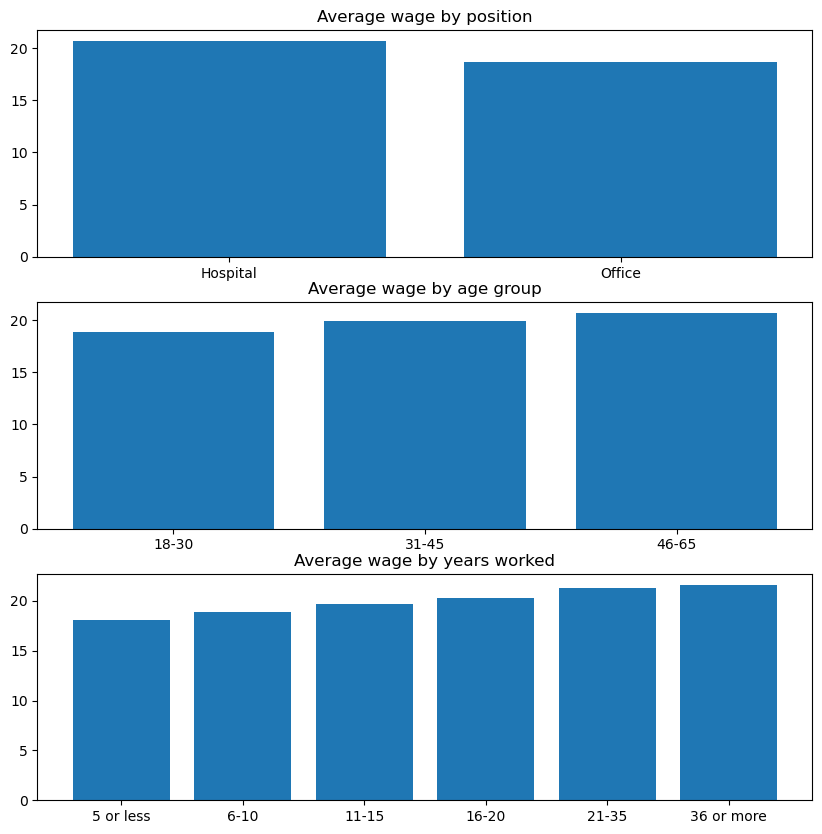

In [115]:
fig, ax = plt.subplots(3, figsize = (10,10))

x = ["Hospital", "Office"]
y = [hospital['hourwage'], office['hourwage']]

x1 = ["18-30", "31-45", "46-65"]
y1 = [thirty, fourty_five, sixty_five]

x2 = ["5 or less", "6-10", "11-15", "16-20", "21-35", "36 or more"]
y2 = [five, six, eleven, sixteen, twenty_one, thirty_six]

ax[0].bar(x, y)
ax[0].set_title("Average wage by position")
ax[1].bar(x1,y1)
ax[1].set_title("Average wage by age group")
ax[2].bar(x2,y2)
ax[2].set_title("Average wage by years worked")

Next generate a training and test set.

In [135]:
X = wage_df.iloc[:,[0,1,2]].values
X[1:4]

array([[0, 1, 2],
       [0, 1, 3],
       [1, 1, 1]], dtype=int64)

In [134]:
X.shape

(2911, 3)

In [136]:
Y = wage_df.iloc[:, 3].values

In [137]:
Y.shape

(2911,)

In [138]:
Y.reshape(-1,1)

array([[13.73623405],
       [16.44073097],
       [21.38910772],
       ...,
       [18.45023401],
       [19.1444598 ],
       [13.63846599]])

In [139]:
X.reshape(-1,3)

array([[1, 1, 2],
       [0, 1, 2],
       [0, 1, 3],
       ...,
       [1, 3, 4],
       [0, 3, 4],
       [0, 3, 3]], dtype=int64)

Now X is a dataframe with all the independent variables. Y is a single column dataframe with the dependent varaible. Both variables are reshaped as per the example. 

In [140]:
wage_model = LinearRegression()
wage_model.fit(X,Y)

LinearRegression()

In [141]:
print("Intercept: \n", wage_model.intercept_)
print("Coefficients: \n", wage_model.coef_)

Intercept: 
 18.261630959472033
Coefficients: 
 [-2.0197037  -0.22575442  0.82398308]


In [149]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

print("Training Data: ", x_train.shape, y_train.shape)
print("Test Data: ", x_test.shape, y_test.shape)


Training Data:  (2328, 3) (2328,)
Test Data:  (583, 3) (583,)


Check for biases in the split. 

In [153]:
print("y_train {}".format(y_train[0:25]))

y_train [20.09097926 20.20805464 24.66867405 17.61873894 14.81133367 20.06018321
 16.11193292 17.50109766 25.07744632 10.45742844 16.58277649 20.82149233
 15.13698165 18.1789228  14.27995176 26.53621163 25.32079789 24.60343385
 24.41719355 18.59596247 10.88014473 18.62381566 16.58520619 21.21198817
 24.49079094]


In [154]:
print("y_test {}".format(y_test[0:25]))

y_test [20.14179349 13.72941582 24.02723214 22.11231629 21.12750639 24.69651224
 20.88365456 16.8804667  23.48868031 21.16165624 20.73847125 16.13048147
 18.82925551 17.49744763 21.98639061 23.16073251 18.68899044 18.64246097
 17.11971415 22.30143219 18.37646063 25.30229431 15.72459976 16.21122515
 24.38088461]


Generate a multiple linear regression model using the training set, use all the variables.

In [155]:
model = LinearRegression()
model = model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [156]:
predictions[0:5]

array([17.72632434, 21.19524514, 21.19524514, 21.19524514, 19.17170397])

These look reasonable when looking at y test and y train values.

Finally, plot an errorbar graph and calculate the r^2 value.

<ErrorbarContainer object of 3 artists>

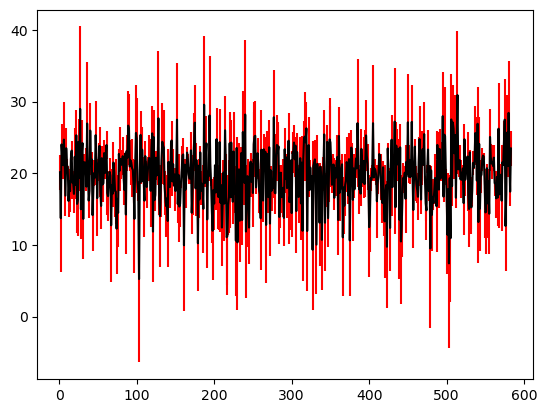

In [158]:
plt.errorbar(range(1,584), y_test, yerr = (y_test - predictions), fmt = 'k', ecolor = 'r')

In [167]:
print(f"R\N{SUPERSCRIPT TWO} Score: ", model.score(x_test,y_test))


R² Score:  0.09994330434273968


In [168]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [-2.02354117 -0.24205245  0.84371604]


This suggests that the first variable, position, is heavily skewed to getting paid more in the hospital (as negative coefficient means 1 *coef is smaller than 0*coef).
Also, the age range, salaries go slightly down as you get older. 
The main cause for getting a higher salary is how long you have been working at the company.
    However, considering the r\^2 score is so low, this is likely unreliable. 